In [1]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageOps
import pathlib
import numpy as np

%matplotlib inline

In [2]:
def draw_annotation(dir_path: pathlib.Path, xml_file: pathlib.Path):
    # Парсим XML файл
    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    # Получаем путь к изображению
    image_name = root.find('filename').text
    image_path = dir_path / image_name
    
    # Открываем изображение
    image = Image.open(image_path)
    # Иногда изображения могут открываться под углом 90 градусов, фиксим это
    image = ImageOps.exif_transpose(image)
    # Печатаем разрешение
    print(f"Разрешение: {image.size}")
    print("="*100)
    # Создаем объект pyplot для отрисовки
    fig, ax = plt.subplots(1, figsize=(15, 24))
    ax.imshow(image)
    
    # Для каждого объекта в разметке отрисовываем прямоугольник
    for obj in root.findall('object'):
        name = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = float(bbox.find('xmin').text)
        ymin = float(bbox.find('ymin').text)
        xmax = float(bbox.find('xmax').text)
        ymax = float(bbox.find('ymax').text)
        
        # Создаем прямоугольник с помощью matplotlib
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
        
        # Добавляем прямоугольник к осям
        ax.add_patch(rect)
        
        # Добавляем название объекта
        ax.text(xmin, ymin, name, fontsize=8, color='black', verticalalignment='top')
    
    # Показываем изображение с разметкой
    plt.show()

def get_random_annotation() -> (pathlib.Path, pathlib.Path):
    # директория, где лежат отчёты с разметкой
    root_path = pathlib.Path("../data/raw/Распознавание текстов/Губернаторские отчеты")
    # получаем рандомную директорию с отчётом
    random_dir: pathlib.Path = np.random.choice(list(root_path.iterdir()))
    # получаем рандомный файл с разметкой из директории с отчётом
    random_annotation = np.random.choice(list(filter(lambda x: "pvoc_imglab.xml" in x.name, list(random_dir.iterdir()))))
    return random_dir, random_annotation

..\data\raw\Распознавание текстов\Губернаторские отчеты\Могилевская 1833-35\IMG_9802_pvoc_imglab.xml
Разрешение: (1704, 2272)


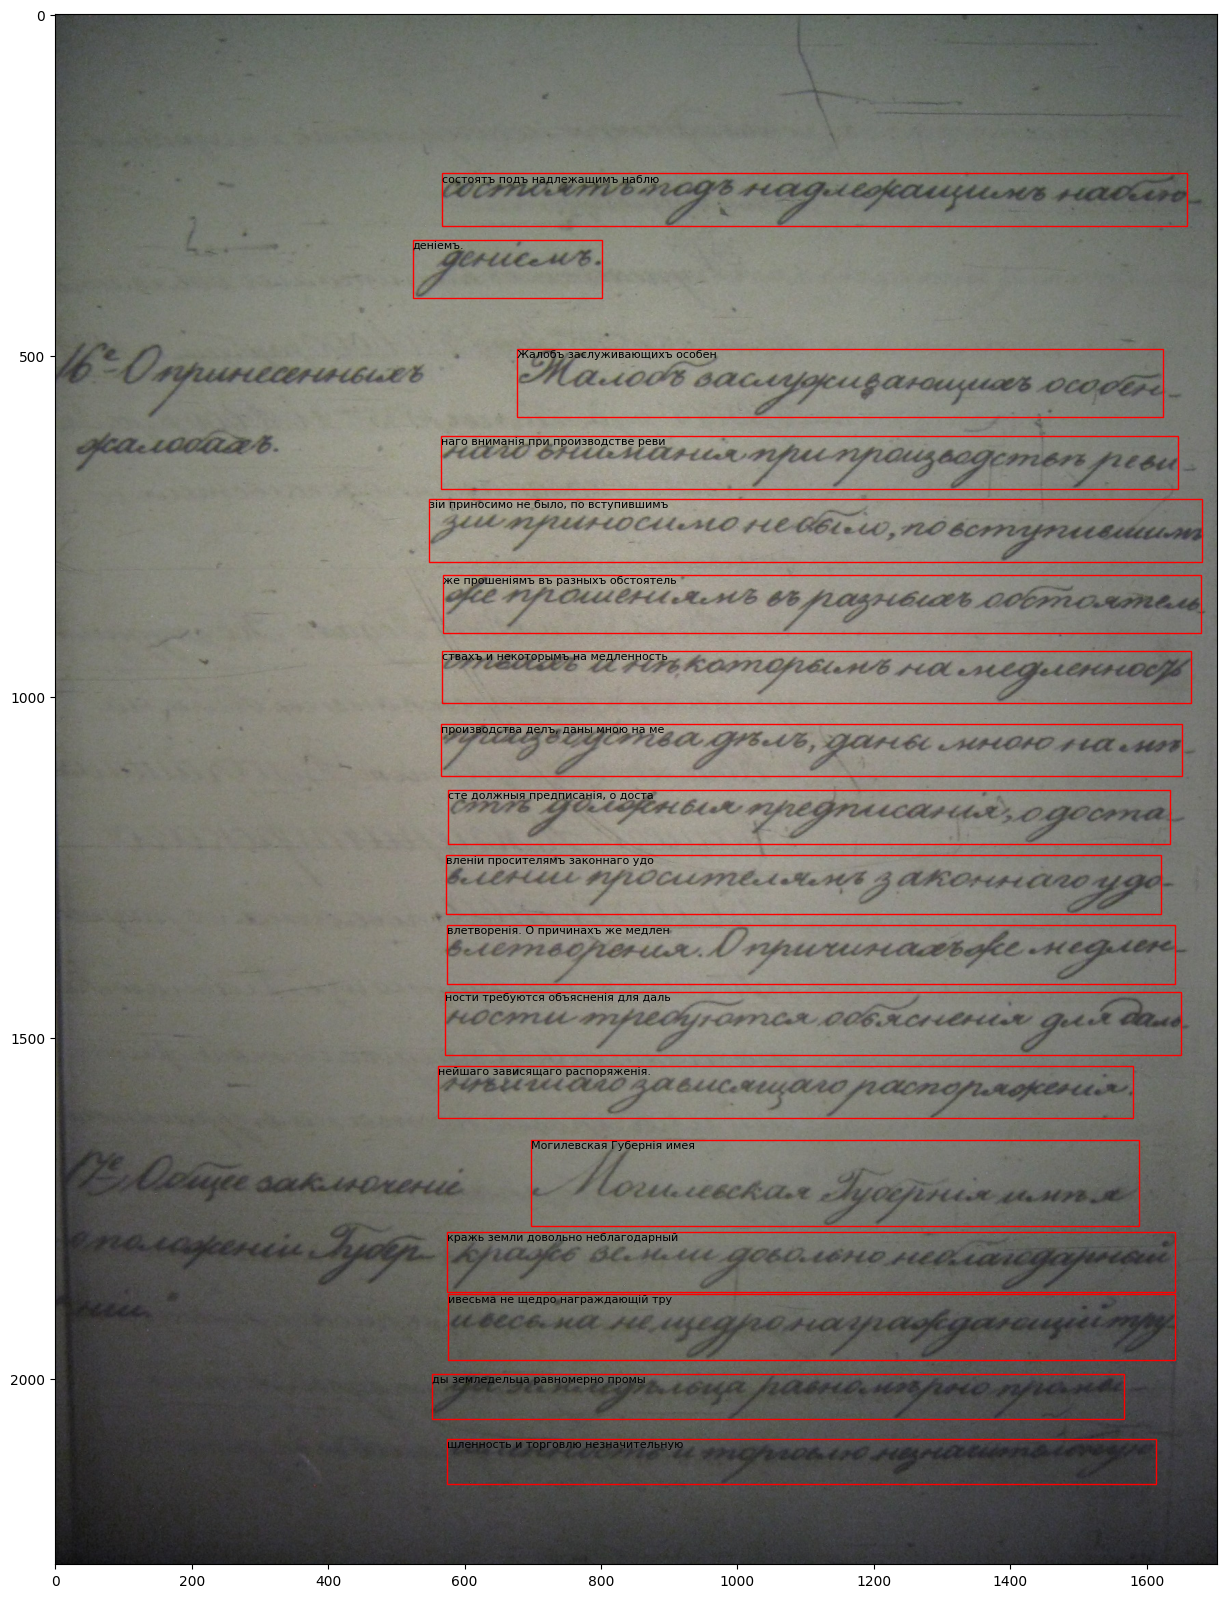

In [19]:
random_dir, random_annotation = get_random_annotation()

print(random_annotation)
print("="*100)
draw_annotation(random_dir, random_annotation)